<img style="float: left;" src="attachment:D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 5 ###

In [1]:
### standard imports
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.predict_functional import predict_functional
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

## Part I: Bayesian Inference

You work as an actuary in an automobile insurance compny. The following table shows one year of claims data: out of total of 9461 policy holders, 7840 made no claims during this year, 1317 made a single claim, 239 made two claims etc. Your job is of course to estimate how many expected claims each policy holder will make in the next year.


| Number of claims x | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |Total
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Count of policy holders | 7840 | 1317 | 239 | 42 | 14 | 4 | 4 | 1 | 9461 |

**Question 1.1**: Let's assume for each policy holder $k$, the number of claims to be made in a single year $X_k$ follows a Poisson distribution with parameter $\theta_k$. From the company's point of view, a good policy holder should have a small value of $\theta$ (why?), though in any one year the actual number of claims $x_k$ will vary randomly according to the probability mass function: 
$$\mathbb{P}(X_k = x) = \frac{ \theta^x e^{-\theta} } {x!}$$
Suppose we want to put a prior distribution $\pi(\theta)$ on the unknown parameter $\theta$, without specifying what this prior distribution $\pi(\theta)$ is, use Bayes formula to derive the posterior distribution $\pi(\theta | x)$ including the normalizing constant, assuming only one single data point $x$: remember for each policy holder you only have their number of claims in one year, i.e. a single data point. Do NOT simplify any terms for now.

**Solution**:


We start from the definition of the posterior probability, which is:

$\pi(\theta \mid x)=\frac{P(x \mid \theta) \pi(\theta)}{P(x)}$

The denominator represents the marginal, so we can write it in terms of the joint distribution:

$\pi(\theta \mid x)=\frac{P(x \mid \theta) \pi(\theta)}{\int P(x, \theta) d \theta}$

We then replace the joint distribution with its relationship with the conditional distribution:

$\pi(\theta \mid x)=\frac{P(x \mid \theta) \pi(\theta)}{\int P(x \mid \theta) \pi(\theta) d \theta}$

According to the problam, $P(x \mid \theta)$ follows a Poisson distribution, so $P(x \mid \theta)=\frac{\theta^x e^{-\theta}}{x !}$. If we replace this into the equation, we obtain:

$\pi(\theta \mid x)=\frac{\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta)}{\int_0^{\infty}\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta) d \theta}$

**Question 1.2**: Assuming you have correctly derived the posterior distribution $\pi(\theta | x)$, what would be a good estimate of expected number of claims a policy holder will make next year, given that he/she has made $x$ claims this year? Write down the expression of your estimate, and do NOT simplify any terms.

**Solution**: 

From the definition, we know that the expectation is calculated as follows:

$\mathbb{E}[\theta \mid x]=\int \theta \pi(\theta \mid x) d \theta$

We can replace the posterior with the equation we obtained in the first part of the problem:

$\mathbb{E}[\theta \mid x]=\int_0^{\infty} \theta \frac{\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta)}{\left[\int_0^{\infty}\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta) d \theta\right]} d \theta$

Considering that once we apply the integral in the denominator, that term will no longer depend on $\theta$, therefore we can take it outside of the overall integral and obtain:

$\mathbb{E}[\theta \mid x]=\frac{\int_0^{\infty}\left[\theta^{(x+1)} \frac{e^{-\theta}}{x !}\right] \pi(\theta) d \theta}{\int_0^{\infty}\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta) d \theta}$

**Question 1.3**: Remember the normalizing constant in your posterior is called the marginal likelihood:
$$f(x) = \int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta$$
Manipulate the expression you got in **1.2** in terms of marginal likelihood, that is, your simplified expression should have no prior distribution $\pi(\theta)$ or even $\theta$!

**Hint:** $(x+1)! = x!  (x+1)$

**Solution**: 


If we multiply the equation from the problem 1.2 by $\frac{(x+1)}{(x+1)}$, we would obtain:


$\mathbb{E}[\theta \mid x]=\frac{\int_0^{\infty}\left[\theta^{(x+1)}(x+1) \frac{e^{-\theta}}{(x+1) x !}\right] \pi(\theta) d \theta}{\int_0^{\infty}\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta) d \theta}$

As $(x+1)$ does not depend on $\theta$, we can take the top part out of the integral and merge the bottom part with the factorial:

$\mathbb{E}[\theta \mid x]=\frac{(x+1) \int_0^{\infty}\left[\theta^{(x+1)} \frac{e^{-\theta}}{(x+1)!}\right] \pi(\theta) d \theta}{\int_0^{\infty}\left[\theta^x \frac{e^{-\theta}}{x !}\right] \pi(\theta) d \theta}$

We can now replace with the given definition of $f(x)$ and get:

$\mathbb{E}[\theta \mid x]=\frac{(x+1)f(x+1)}{f(x)}$

**Question 1.4**: Based on the data you have, what is a good estimate of $f(x)$? Notice this is a discrete distribution even though we call it $f(x)$, because $x$ can only take integer values. In other words, estimate $\mathbb{P}(X = x)$ from the table in the problem. 

**Hint:** this is really simpler than you think, remember the empirical distribution of your data?

**Solution**: 

A good estimate of $f(x)$ could be the proportion of the number of policy holders according each number of claims over the total of policy holders. For example, $f(x=0) = \frac{7849}{9461}$. We can calculate each $f(x)$, as follows:

In [2]:
polhol = np.array([7840, 1317, 239 , 42, 14, 4, 4, 1])
total = np.sum(polhol)
f_x = polhol/total
for x in range(len(f_x)):
    print("f(x) of x=", x, "is", round(f_x[x],6))

f(x) of x= 0 is 0.828665
f(x) of x= 1 is 0.139203
f(x) of x= 2 is 0.025262
f(x) of x= 3 is 0.004439
f(x) of x= 4 is 0.00148
f(x) of x= 5 is 0.000423
f(x) of x= 6 is 0.000423
f(x) of x= 7 is 0.000106


**Question 1.5**: Estimate the expected number of claims next year for policy holders who made 0 to 6 claims this year, round to 3 decimal places.

**Solution**: 

In [3]:
polhol = np.array([7840, 1317, 239 , 42, 14, 4, 4, 1])
total = np.sum(polhol)
f_x = polhol/total
for x in range(len(polhol)-1):
    E_t = (x+1)*f_x[x+1]/f_x[x]
    print("Policy holders form group of", x, "claims last year. Have a expected number of claims of", round(E_t,3), "this year.")

Policy holders form group of 0 claims last year. Have a expected number of claims of 0.168 this year.
Policy holders form group of 1 claims last year. Have a expected number of claims of 0.363 this year.
Policy holders form group of 2 claims last year. Have a expected number of claims of 0.527 this year.
Policy holders form group of 3 claims last year. Have a expected number of claims of 1.333 this year.
Policy holders form group of 4 claims last year. Have a expected number of claims of 1.429 this year.
Policy holders form group of 5 claims last year. Have a expected number of claims of 6.0 this year.
Policy holders form group of 6 claims last year. Have a expected number of claims of 1.75 this year.


**You have just completed a Bayesian inference problem, without specifying any prior distribution!** Remember the posterior distribution is not available for any single policy holder without specifying a prior distribution. However, when you have data from a large study, it's as if large data sets of parallel situations carry within them their own Bayesian information. This technique came as a surprise to the statistical world in the begining, known as "empirical Bayes" where the prior information is estimated empirically from the data. In the age of big data, there has been a growing popularity of empirical Bayes methods.

## Part II: Stochastic Processes

**Question 2.1**: Let $X_0, X_1, \dots$ be a Markov chain with states $\{ 0, 1, 2 \}$ and transition matrix

$$ P = \begin{bmatrix}
0.1 & 0.2 & 0.7 \\
0.9 & 0.1 & 0.0 \\
0.1 & 0.8 & 0.1
\end{bmatrix}$$

Assume that the initial distribution is $\pi_0 = (0.3, 0.4, 0.3)$.  Find $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)$ and $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 1)$.

**Solution:**

$\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)$

From the initial distribution, we know that $X_0=0$ has a probability of 0.3. The probability of passing from state 0 (first row of transition matrix) to state 1 (second column in our transition matrix) is 0.2, then the probability of passing from state 1 (second row of transition matrix) to state 2 (third column of transition matrix) is 0.

Finally our probability will be given by the multiplication of each probability:

$\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)= 0.3 x 0.2 x 0 =0$ 

$\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 1)$

From the initial distribution, we know that $X_0=0$ has a probability of 0.3. The probability of passing from state 0 (first row of transition matrix) to state 1 (second column in our transition matrix) is 0.2, then the probability of staying from state 1 (second row of transition matrix) to state 1 (third column of transition matrix) is 0.1.

Finally our probability will be given by the multiplication of each probability:

$\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)= 0.3 x 0.2 x 0.1 =0.006$ 

**Question 2.2**: Let $Y_1, Y_2, \dots$ be a sequence of iid observations such that $\mathbb{P}(Y = 0) = 0.1$, $\mathbb{P}(Y = 1) = 0.3$,  $\mathbb{P}(Y = 2) = 0.2$, $\mathbb{P}(Y = 3) = 0.4$.  Let $X_0 = 0$ and let

$$ X_n = \max \{ Y_1, \dots, Y_n \} $$

Show that $X_0, X_1, \dots$ is a Markov chain and find the transition matrix.

**Solution:**

In this case, we can interpret the rows to be the value of $X_{n}$ and the columns to be the value of $X_{n+1}$. If we consider the initial state $X_0$ to be 0, then the probability of X remaining at the value 0 and the probability of X moving to the values 1,2 or 3 will depend only on the probability of observing Y with those values. Therefore our first row will be given by the following vector:

$$\begin{bmatrix} \frac{1}{10} \frac{3}{10} \frac{2}{10}  \frac{4}{10} \end{bmatrix}$$

Let's suppose now that we observe $Y=1$, in this case if we see in the observation after that one that $Y=0$, then the value of $X$ will remain in 1, as X is defined as the max values of all observed Y. Therefore the probability of X transitioning from 1 to 0 is 0; and the probability of staying in 1 becomes the cummulative probability of $Y=0$ and $Y=1$. So our second row is defined by the following vector:

$$\begin{bmatrix} 0 & \frac{4}{10} & \frac{2}{10} & \frac{4}{10} \end{bmatrix}$$

If we apply the same logic to the last two rows, we will end up with the following transition matrix:

$$ P = \begin{bmatrix}
\frac{1}{10} & \frac{3}{10} & \frac{2}{10} & \frac{4}{10} \\
0 & \frac{4}{10} & \frac{2}{10} & \frac{4}{10} \\
0 & 0 & \frac{6}{10} & \frac{4}{10} \\
0 & 0 & 0 & 1 \\
\end{bmatrix}$$

**Question 2.3**: Su wants to start a Boba tea shop near Rice. The plan is to have the shop open from 9am to 5pm everyday, and she needs to study her potential customer base to determine how large her shop should be. Suppose people start to arrive following a Poisson process with intensity $\lambda=1/2$ / min. Assume that a person stays in the shop for some random time (in min) that follows exponential distribution with $\lambda=1/15$, and is independent of other people. Let $Y(t)$ be the number of people in the shop at time t. It turns out that $Y(t)$ is a Poisson process with inhomogeneous rate. Can you simulate $Y(t)$? Based on your simulation, what would be the expected maximum number of people in the shop?

**Hint**: Create a function that can simulate one realization of the process $Y(t)$, i.e., number of customers at any given time $t$ for a given day. You can assume the smallest time increment is minute, i.e., you will simulate $Y(t)$ for $t$ being any minute of a day from 9am to 5pm. Then use your function to simulate multiple days, and use empirical probability to calculate the expected maximum number!

**Simulation Solution**:

In [4]:
def su_store(l_estore, l_instore, open_min):
    enter_time = np.array([]) #array that will cointain the time in which each customer enters the store
    exit_time = np.array([]) #array that contains the time in which each customer leaves the store
    next_etime = np.random.exponential(1/l_estore) #time passed after next customer gets to the store
    acc_time = next_etime #time passed between the store opened and the first customer
    p_instore = np.array([]) #number of people each time a new customer enters the store

    while acc_time < open_min:
        enter_time = np.append(enter_time, acc_time) #populates the array with the time people enter
        exit_time = np.append(exit_time, acc_time + np.random.exponential(1/l_instore)) #time people leave
        next_etime = np.random.exponential(1/l_estore) #random time between next customer
        p_instore = np.append(p_instore, sum(exit_time>acc_time)) #random time new customers stays in the store
        acc_time += next_etime #update the value of time
    
    return (len(enter_time),max(p_instore), enter_time, exit_time)

In [5]:
def p_store(arr_enter, arr_exit, time): #function that represents Y(t)
    counter = 0
    for i in range(len(arr_enter)):
    #counts the number of people who entered before the given time and haven't left
        if (arr_enter[i] < time) and (arr_exit[i] > time):
            counter += 1
    return counter

In [6]:
#Trial of the Y(t)
t_clients, m_clients, enter_time, exit_time = su_store(1/2, 1/15, 480)
print(p_store(enter_time, exit_time, 240))

3


In [7]:
rep = 10000
np.random.seed = 10
total_clients = []
max_clients = []
for i in range(rep):
    t_clients, m_clients, enter_time, exit_time = su_store(1/2, 1/15, 480)
    total_clients.append(t_clients)
    max_clients.append(m_clients)

Total customers during the whole day

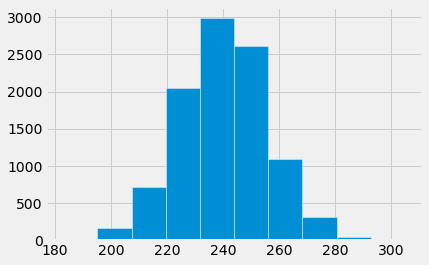

In [8]:
plt.hist(total_clients)
plt.show()

Max number of customer in during certain time each day

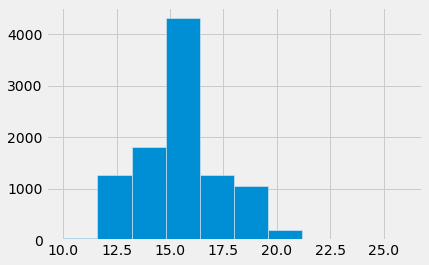

In [9]:
plt.hist(max_clients)
plt.show()

In [10]:
print("The mean max number of customers is", round(np.mean(max_clients),0), ", the max is", 
      np.max(max_clients), "and the min is", np.min(max_clients))

The mean max number of customers is 15.0 , the max is 26.0 and the min is 10.0


**Question 2.4**:  Let $X(t)$ be a Poisson process with intensity $\lambda$.  Find the conditional distribution of $X(t)$ given that $X(t + s) = n$.

**Hint**: Both $X(t)$ and $X(t + s)$ are discrete random variables. Start with definition of conditional probability. 

**Solution:**

We know that $X(t)$ follows a Poisson distribution with parameter $\lambda t$. We can define $X(s)=X(t-s)-X(t)$, where $X(s)$ follows a Poisson distribution with paramete $\lambda s$. In this case both are independet, considering that both are increments.

$P(X(t)=x \mid X(t)+X(s)=n) =\frac{P(X(t), X(t)+X(s)=n)}{P(X(t)+X(s)=n)}$

As we know that $X(t)$ is equal to $x$, we can express iin the following way $X(s)=n-x$:

$P(X(t)=x \mid X(t)+X(s)=n)=\frac{P(X(t)=x, X(s)=n-x)}{\sum_{i=0}^n P(X(t)=i, X(s)=n-i)}$ 

$P(X(t)=x \mid X(t)+X(s)=n)=\frac{P(X(t)=x) P(X(s)=n-x)}{\sum_{i=0}^n P(X(t)=i) P(X(s)=n-i)}$

To simplify the calculation, we can define a momentary function $f(x) = P(X(t)=x) P(X(s)=n-x)$, and rewrite our equation with this term:

$P(X(t)=x \mid X(t)+X(s)=n)=\frac{f(x)}{\sum_{i=0}^n f(i)}$


We can then introduce the poisson equation in this expression:

$f(x) =P(x(t)=x) p(x(s)=n-x)$

$f(x)=\frac{(\lambda t)^x e^{-\lambda t}}{x !} \frac{(\lambda s)^{n-x} e^{-\lambda s}}{(n-x) !} $

$f(x)=\frac{\lambda^n e^{-\lambda(t+s)} t^x s^{n \cdot}}{x !(n-x) !} \frac{n !}{n !} $

$f(x) = \left(\begin{array}{l}n \\ x\end{array}\right) \frac{\lambda^n t^x s^{n-x} e^{-\lambda(t+x)}}{n !} $

If we insert this simplified version of f(x) to our initial expression, we obtain:

$P(X(t) \mid x(t)+X(s)=n)=\frac{\left(\begin{array}{l}n \\ x\end{array}\right) \frac{x^\alpha t^x s^{n-x} e^{-x(x+1)}}{\not x !}}{\sum_{i=0}^n\left(\begin{array}{l}n \\ i\end{array}\right) \frac{\chi^n t^i s^{n-i} e^{-x(t+1)}}{n x}}$

$P(X(t) \mid x(t)+X(s)=n) =\frac{\left(\begin{array}{l}n \\ x\end{array}\right) t^x s^{n-x}}{\sum_{i=0}^n\left(\begin{array}{l}n \\ 1\end{array}\right) t^i s^{n-1}}$

In this case, the denominator is the expanded form of the binomial equation, $\sum_{i=0}^n\left(\begin{array}{l}n \\ 1\end{array}\right) t^i s^{n-1}= (t+s)^n$

$P(X(t) \mid x(t)+X(s)=n) =\frac{\left(\begin{array}{l}n \\ x\end{array}\right) t^x s^{n-x}}{(t+s)^n}$

$P(X(t) \mid x(t)+X(s)=n) =\left(\begin{array}{l}n \\ x\end{array}\right) \frac{t^x s^{n-x}}{(t+s)^x(t+s)^{n-x}}$

$P(X(t) \mid x(t)+X(s)=n) =\left(\begin{array}{l}n \\ x\end{array}\right)\left(\frac{t}{(t+s)}\right)^x\left(\frac{s}{(t+s)}\right)^{n-x}$

$ P(X(t) \mid x(t)+X(s)=n) =$ Binomial $\left(n, \frac{t}{t+s}\right)$

## Part III: NHANES Case Study

In this part, we will be working with the [NHANES](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) data again. We will perform the same processing and cleaning of the data as before:

In [11]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
# fix column names to be informative
new_col_names = {'SEQN':'ID', 'ALQ130':'avg_drinks_per_day', 'SMQ020': 'smoker', 
                 'RIAGENDR':'gender', 'RIDAGEYR':'age', 'RIDRETH1':'race', 
                 'DMDCITZN':'citizen', 'DMDEDUC2':'educ_level', 
                 'DMDMARTL':'mari_stat', 'INDFMPIR':'fam_pov_income_ratio', 
                 'BPXSY1':'systolic_bp', 'BPXDI1':'diastolic_bp', 
                 'BMXWT':'weight', 'BMXHT':'height', 'BMXBMI':'bmi', 
                 'BMXLEG':'upper_leg_len', 'BMXARML':'upper_arm_len', 
                 'BMXARMC': 'arm_cir', 'BMXWAIST':'waist_cir'}
nhanes.rename(columns=new_col_names, inplace=True)
# replace some code as missing values
nhanes['avg_drinks_per_day'] =  nhanes['avg_drinks_per_day'].replace({777:np.NaN, 999:np.NaN})
nhanes['smoker'] = nhanes['smoker'].replace({7:np.NaN, 9:np.NaN})
nhanes['educ_level'] = nhanes['educ_level'].replace({7:np.NaN, 9:np.NaN})
nhanes['mari_stat'] = nhanes['mari_stat'].replace({77:np.NaN})
nhanes['citizen'] = nhanes['citizen'].replace({7:np.NaN, 9:np.NaN})
# there are quite a few missing values but most model will exclude them
nhanes.head()

,ID,ALQ101,ALQ110,avg_drinks_per_day,smoker,gender,age,race,citizen,educ_level,...,BPXSY2,BPXDI2,weight,height,bmi,upper_leg_len,upper_arm_len,arm_cir,waist_cir,HIQ210
0,83732,1.0,NaN,1.0,1.0,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1.0,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1.0,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2.0,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2.0,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


**Question 3.1:**  
Use linear regression to relate the expected body mass index (BMI) to a person's age.

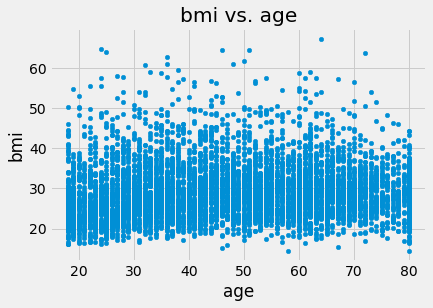

In [12]:
# enter your code here
nhanes.plot(kind='scatter', x='age', y='bmi')
plt.title('bmi vs. age');

In [13]:
### OLS Model
# from_formula can create a model from a formula and dataframe
# otherwise need to manually create design matrix
model = sm.OLS.from_formula('bmi ~ age', data=nhanes)
result = model.fit()
# print model summary
result.summary()
# to print out parameters only use
#result.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.21e-06
Time:                        09:35:09   Log-Likelihood:                -19118.
No. Observations:                5662   AIC:                         3.824e+04
Df Residuals:                    5660   BIC:                         3.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2788      0.263    107.496      0.000      27.763      28.795
age            0.0230      0.005      4.492      0.000       0.013       0.033
==============================================================================
Omnibus:                     1083.068   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2193.456
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       5.025   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.1.1:**  According to your fitted model, do older people tend to have higher or lower BMI than younger people?

**Solution:**  

They tend to have a slightly higher bmi, but the effect of age is quite small on the overall bmi value. For every unit change in the age, the BMI value will change 0.023.

**3.1.2:**   Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

**Solution:**  

Yes, because the p-value is really small (less than 0.05), therefore we reject that our slope is equal to 0. However, the R2 is very small, and the beta value is very small compared to the intercept; so the covariate itself doesn't explain most of the BMI change. 

**3.1.3:** By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

**Solution:**  

In [14]:
inter_value = 28.2788
beta_age = 0.0230

bmi_40 = beta_age*40 + inter_value
bmi_20 = beta_age*20 + inter_value
print("According to the model, the average BMI of a 40 year old differs from a 20 year old by:", bmi_40-bmi_20)

According to the model, the average BMI of a 40 year old differs from a 20 year old by: 0.4599999999999973


**3.1.4:** What fraction of the variation of BMI in this population is explained by age?

**Solution:**  

Only 0.4% of the variation of BMI in this population is explained by age.

**Question 3.2:**

Add gender and race as additional control variables to your linear model relating BMI to age. To make results more readable, you can choose to recode the gender and race groups based on:

- Gender:
    - 1: Male (it is 0 in my model)
    - 2: Female (it is 1 in my model)
- Race: 
    - 1: Mexican American
    - 2: Other Hispanic
    - 3: Non-Hispanic White
    - 4: Non-Hispanic Black
    - 5: Other Race Including Multi-Racial
    
Otherwise, you need to use `C(Race)` and `C(Gender)` to be included as categorical variables correctly (since they are coded as numbers).

In [15]:
nhanes['gender'] = nhanes['gender'].map({1: 0, 2: 1}) # converts male from variable 1 to 0 and female from 2 to 1

In [16]:
### OLS Model
model = sm.OLS.from_formula('bmi ~ age + gender + C(race) ', data=nhanes)
result1 = model.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     55.09
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.18e-66
Time:                        09:35:09   Log-Likelihood:                -18968.
No. Observations:                5662   AIC:                         3.795e+04
Df Residuals:                    5655   BIC:                         3.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.4478      0.335     87.943      0.000      28.791      30.104
C(race)[T.2]    -1.1240      0.334     -3.364      0.001      -1.779      -0.469
C(race)[T.3]    -1.8350      0.273     -6.715      0.000      -2.371      -1.299
C(race)[T.4]    -0.5707      0.295     -1.934      0.053      -1.149       0.008
C(race)[T.5]    -4.7212      0.318    -14.849      0.000      -5.345      -4.098
age              0.0205      0.005      4.054      0.000       0.011       0.030
gender           1.0696      0.184      5.819      0.000       0.709       1.430
==============================================================================
Omnibus:                     1055.828   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.403
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                       5.071   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.2.1:** How did the mean relationship between BMI and age change when you added additional covariates to the model?

**Solution:**  

It has been slightly reduced from 0.0230 to 0.0205. The meaning of this value also changes because by adding new covariates, we are not talking about correlation, but about partial correlation.

**3.2.2:** How did the standard error for the regression parameter for age change when you added additional covariates to the model?

**Solution:**  

The standard error has remained the same when the new covariates were added.

**3.2.3:** How much additional variation in BMI is explained by age, gender, and race that is not explained by age alone?

**Solution:**  

By adding these other parameters, we improve how the model explains the variation of the BMI, taking into account our $R^2$ changed from 0.4% to 5.5% (1.5% more).

**3.2.4:** What reference level did the software select for the race variable?

**Solution:**  

The reference level selected by the software was Mexican American.

**3.2.5:**  What is the expected difference between the BMI of a 40 year-old non-Hispanic white man and a 30 year-old Hispanic man?

**Solution:** 

In [17]:
NHW_40 = -1.835 * (1) + 0.0205 * (40) + (1.0696) * 0 + 29.4478
HW_30 = -1.124 * (1) + 0.0205 * (30) + (1.0696) * 0 + 29.4478

print("The difference in BMI between both groups is: ", NHW_40 - HW_30)

The difference in BMI between both groups is:  -0.5060000000000002


**3.2.6:** What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic white man?

In [18]:
MXW_50 = 0.0205 * (50) + (1.0696) * 1 + 29.4478
NHM_50 = -1.835 * (1) + 0.0205 * (50) + (1.0696) * 0 + 29.4478

print("The difference in BMI between both groups is: ", MXW_50 - NHM_50)

The difference in BMI between both groups is:  2.9045999999999985


**Question 3.3:** Randomly sample 25% of the NHANES data, then fit the same model you used in question 2.2 to this data set.

You can use [`df.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) and set `frac=0.25` and `random_state=2021`.

In [19]:
df25 = nhanes.sample(frac=0.25, random_state=2021)
### OLS Model
model = sm.OLS.from_formula('bmi ~ age + gender + C(race) ', data=df25)
result2 = model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     12.29
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.60e-13
Time:                        09:35:09   Log-Likelihood:                -4714.1
No. Observations:                1413   AIC:                             9442.
Df Residuals:                    1406   BIC:                             9479.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.7224      0.658     43.672      0.000      27.432      30.013
C(race)[T.2]    -0.5214      0.684     -0.762      0.446      -1.864       0.821
C(race)[T.3]    -1.4633      0.552     -2.651      0.008      -2.546      -0.381
C(race)[T.4]     0.4332      0.582      0.744      0.457      -0.708       1.575
C(race)[T.5]    -3.9148      0.631     -6.202      0.000      -5.153      -2.677
age              0.0245      0.010      2.493      0.013       0.005       0.044
gender           0.5199      0.364      1.430      0.153      -0.193       1.233
==============================================================================
Omnibus:                      328.882   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.906
Skew:                           1.223   Prob(JB):                    1.03e-185
Kurtosis:                       5.913   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.3.1:** How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

**Solution:** 

We can see that all the coefficients have changed. Moreover, the standard errors have increased by twice its amount. 

If we see at the p-values, we can see that some coefficients are not significant anymore. With this, we cannot really assure that there is a difference between all races.

**Question 3.4:** Visualize the model you fit in question 2.2.

**3.4.1:** Generate a scatterplot of the residuals against the fitted values.

In [20]:
model = sm.OLS.from_formula('bmi ~ age + gender + C(race)', data=nhanes)
f_result = model.fit()
f_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     55.09
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.18e-66
Time:                        09:35:09   Log-Likelihood:                -18968.
No. Observations:                5662   AIC:                         3.795e+04
Df Residuals:                    5655   BIC:                         3.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.4478      0.335     87.943      0.000      28.791      30.104
C(race)[T.2]    -1.1240      0.334     -3.364      0.001      -1.779      -0.469
C(race)[T.3]    -1.8350      0.273     -6.715      0.000      -2.371      -1.299
C(race)[T.4]    -0.5707      0.295     -1.934      0.053      -1.149       0.008
C(race)[T.5]    -4.7212      0.318    -14.849      0.000      -5.345      -4.098
age              0.0205      0.005      4.054      0.000       0.011       0.030
gender           1.0696      0.184      5.819      0.000       0.709       1.430
==============================================================================
Omnibus:                     1055.828   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.403
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                       5.071   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

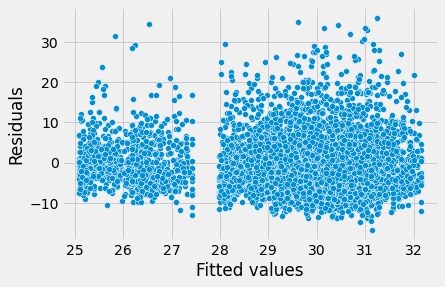

In [21]:
pp = sns.scatterplot(f_result.fittedvalues, f_result.resid)
pp.set_xlabel('Fitted values')
_ = pp.set_ylabel('Residuals')

**3.4.2:** Generate a scatterplot of true values against the fitted values.

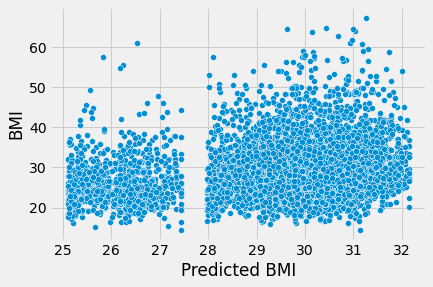

In [22]:
pp = sns.scatterplot(f_result.fittedvalues, nhanes['bmi'])
pp.set_xlabel('Predicted BMI')
_ = pp.set_ylabel('BMI')

**Question 3.5:**

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% confidence band on your graph.

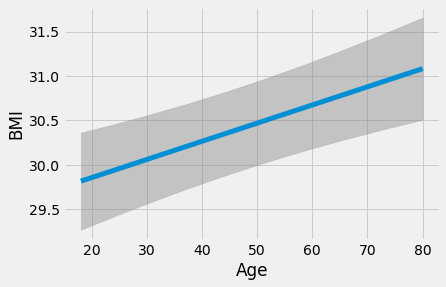

In [23]:
pred, CI, X = predict_functional(f_result, 'age', values = {'race':1, 'gender':0})

ax = sns.lineplot(X, pred, lw=5)
ax.fill_between(X, CI[:, 0], CI[:, 1], color='grey', alpha=0.4)
ax.set_xlabel('Age')
_ = ax.set_ylabel('BMI')

**3.5.1:** According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  
**Hint:** What is the longest horizontal line starting at age 30 that remains within the confidence band?

**Solution:** 

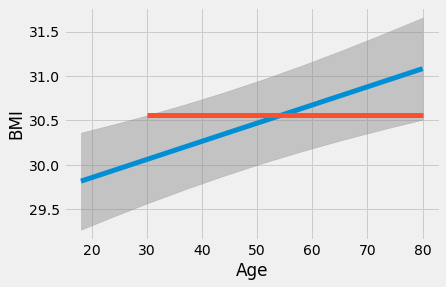

In [26]:
pred, CI, X = predict_functional(f_result, 'age', values = {'race':1, 'gender':0})

ax = sns.lineplot(X, pred, lw=5)
ax.fill_between(X, CI[:, 0], CI[:, 1], color='grey', alpha=0.4)
ax = sns.lineplot(np.linspace(30,80,9), [CI[2,1]]*9, lw=5)
ax.set_xlabel('Age')
_ = ax.set_ylabel('BMI')

The longest horizontal line that starts from 30 and stays within the confidence intervals has a length of 43. It starts from the Age of 30 and goes until 73.

**3.5.2:** Create lines and confidence bands on the same plot, showing the relationship between age and BMI for white men and women.

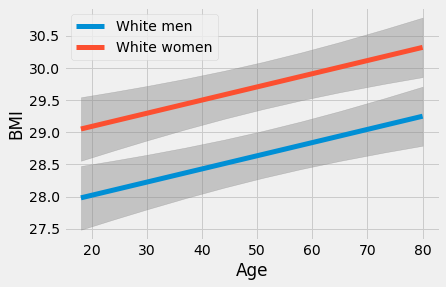

In [25]:
pred1, CI1, X1 = predict_functional(f_result, 'age', values = {'race':3, 'gender':0})
ax = sns.lineplot(X1, pred1, lw=5, label='White men')
ax.fill_between(X1, CI1[:, 0], CI1[:, 1], color='grey', alpha=0.4)

pred2, CI2, X2 = predict_functional(f_result, 'age', values = {'race':3, 'gender':1})
ax = sns.lineplot(X2, pred2, lw=5, label='White women')
ax.fill_between(X2, CI2[:, 0], CI2[:, 1], color='grey', alpha=0.4)


ax.set_xlabel('Age')
_ = ax.set_ylabel('BMI')
ax.legend()

**3.5.3:** At what ages do these intervals not overlap? What does the result imply?

**Solution:** 

They don't overlap, this implies that white women have higher BMI than white men at all ages.

You're done with HW 5!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing LASTNAME with your last name,
* **Upload** your file to the course website.